In [1]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

In [2]:
DATA_PATH = "/kaggle/input/speech-command-dataset/go_left_right_stop.json"
# SAVED_MODEL_PATH = "CNN_Journal.h5"
EPOCHS = 300
BATCH_SIZE = 16

In [3]:
with open(DATA_PATH, "r") as fp:
    data = json.load(fp)

X = np.array(data["MFCCs"])
y = np.array(data["labels"])

In [4]:
test_size=0.2
validation_size=0.2

# membuat train, validation, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=1)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [5]:
class TestCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_test, y_test):
        self.test_data = X_test, y_test

    def on_epoch_end(self, epoch, logs = None): 
        X_test, y_test = self.test_data
        loss, acc = model.evaluate(X_test, y_test)

## CNN

In [6]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001

model = tf.keras.models.Sequential()

# 1st conv layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

# 2nd conv layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

# 3rd conv layer
model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu',))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

# flatten output and feed into dense layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

model.add(tf.keras.layers.Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.3)

model.add(tf.keras.layers.Dense(64, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()

2023-02-11 06:17:22.984325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 11, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 6, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 4, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 1, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0

2023-02-11 06:17:23.075562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 06:17:23.076374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 06:17:23.077512: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 06:17:23.077848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [7]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

Epoch 1/300


2023-02-11 06:17:26.002513: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-11 06:17:27.385932: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


88/88 [==============================] - 0s 2ms/step - loss: 0.9296 - accuracy: 0.6131
Epoch 2/300
88/88 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.7253
Epoch 3/300
88/88 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.7839
Epoch 4/300
88/88 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.8174
Epoch 5/300
88/88 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8307
Epoch 6/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8532
Epoch 7/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8785
Epoch 8/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8928
Epoch 9/300
88/88 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8942
Epoch 10/300
88/88 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.9078
Epoch 11/300
88/88 [=

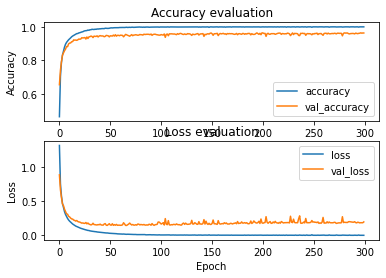

In [8]:
fig, axs = plt.subplots(2)

# create accuracy subplot
axs[0].plot(history.history["accuracy"], label="accuracy")
axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# create loss subplot
axs[1].plot(history.history["loss"], label="loss")
axs[1].plot(history.history['val_loss'], label="val_loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()

In [9]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9682

Test loss: 0.15176859498023987, test accuracy: 96.82029485702515
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

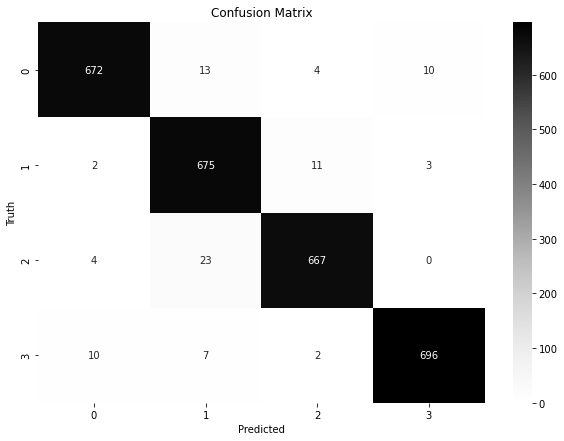

In [10]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

## LSTM 

In [11]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=input_shape))

model.add(tf.keras.layers.Reshape((1, X_train.shape[1]*X_train.shape[2])))

# LSTM layer
model.add(tf.keras.layers.LSTM(512))

#dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 572)               0         
_________________________________________________________________
reshape (Reshape)            (None, 1, 572)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 512)               2222080   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 2,354,436
Trainable params: 2,354,436
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

Epoch 1/300
88/88 [==============================] - 0s 2ms/step - loss: 1.1682 - accuracy: 0.5556
Epoch 2/300
88/88 [==============================] - 0s 2ms/step - loss: 0.9979 - accuracy: 0.6592
Epoch 3/300
88/88 [==============================] - 0s 2ms/step - loss: 0.8650 - accuracy: 0.7174
Epoch 4/300
88/88 [==============================] - 0s 2ms/step - loss: 0.7703 - accuracy: 0.7410
Epoch 5/300
88/88 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.7592
Epoch 6/300
88/88 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7799
Epoch 7/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7949
Epoch 8/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.8092
Epoch 9/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8267
Epoch 10/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.8303
Epoch 11/

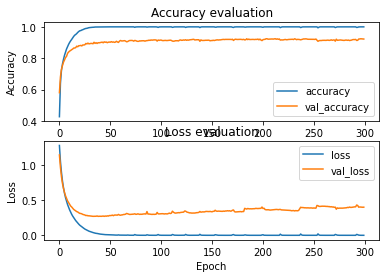

In [13]:
fig, axs = plt.subplots(2)

# create accuracy subplot
axs[0].plot(history.history["accuracy"], label="accuracy")
axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# create loss subplot
axs[1].plot(history.history["loss"], label="loss")
axs[1].plot(history.history['val_loss'], label="val_loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()

In [14]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.9171

Test loss: 0.4066266715526581, test accuracy: 91.71132445335388
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

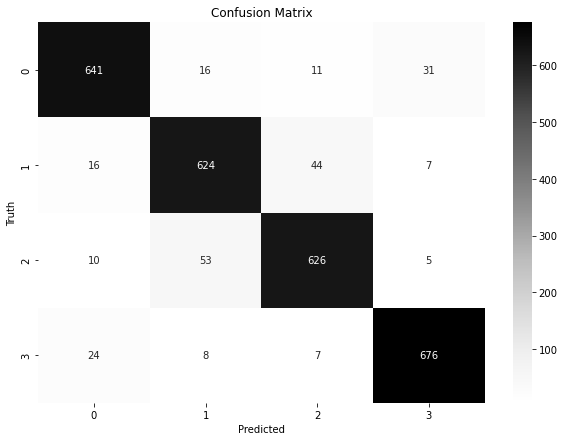

In [15]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

## ANN

In [16]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=input_shape))

# 1st dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

# 2nd dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.3)

# 3rd dense layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 572)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               146688    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 260       
Total params: 188,100
Trainable params: 188,100
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

Epoch 1/300
88/88 [==============================] - 0s 2ms/step - loss: 7.4822 - accuracy: 0.4798
Epoch 2/300
88/88 [==============================] - 0s 2ms/step - loss: 4.9565 - accuracy: 0.5763
Epoch 3/300
88/88 [==============================] - 0s 2ms/step - loss: 3.8823 - accuracy: 0.6263
Epoch 4/300
88/88 [==============================] - 0s 3ms/step - loss: 3.2368 - accuracy: 0.6663
Epoch 5/300
88/88 [==============================] - 0s 2ms/step - loss: 2.8312 - accuracy: 0.6885
Epoch 6/300
88/88 [==============================] - 0s 2ms/step - loss: 2.5203 - accuracy: 0.7160
Epoch 7/300
88/88 [==============================] - 0s 2ms/step - loss: 2.3165 - accuracy: 0.7331
Epoch 8/300
88/88 [==============================] - 0s 2ms/step - loss: 2.1850 - accuracy: 0.7385
Epoch 9/300
88/88 [==============================] - 0s 2ms/step - loss: 1.9898 - accuracy: 0.7517
Epoch 10/300
88/88 [==============================] - 0s 2ms/step - loss: 1.8160 - accuracy: 0.7667
Epoch 11/

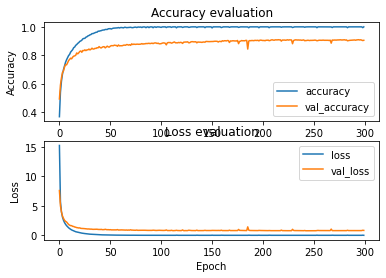

In [18]:
fig, axs = plt.subplots(2)

# create accuracy subplot
axs[0].plot(history.history["accuracy"], label="accuracy")
axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# create loss subplot
axs[1].plot(history.history["loss"], label="loss")
axs[1].plot(history.history['val_loss'], label="val_loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()

In [19]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.9175

Test loss: 0.7186583876609802, test accuracy: 91.74705147743225
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

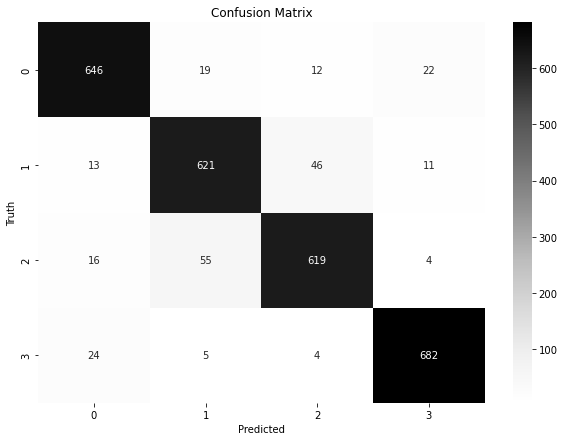

In [20]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

## GRU

In [21]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((input_shape[0], input_shape[1]), input_shape=input_shape))
model.add(tf.keras.layers.GRU(128, return_sequences=True))
model.add(tf.keras.layers.GRU(64))

# 1st dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

# 2nd dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 44, 13)            0         
_________________________________________________________________
gru (GRU)                    (None, 44, 128)           54912     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 516       
Total params: 142,212
Trainable params: 142,212
Non-trainable params: 0
________________________________________________

In [22]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

Epoch 1/300
88/88 [==============================] - 0s 3ms/step - loss: 1.2884 - accuracy: 0.5284
Epoch 2/300
88/88 [==============================] - 0s 3ms/step - loss: 1.1509 - accuracy: 0.6224
Epoch 3/300
88/88 [==============================] - 0s 3ms/step - loss: 0.9787 - accuracy: 0.6742
Epoch 4/300
88/88 [==============================] - 0s 3ms/step - loss: 0.8302 - accuracy: 0.7042
Epoch 5/300
88/88 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.7360
Epoch 6/300
88/88 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.7553
Epoch 7/300
88/88 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.7713
Epoch 8/300
88/88 [==============================] - 0s 4ms/step - loss: 0.5588 - accuracy: 0.7839
Epoch 9/300
88/88 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7971
Epoch 10/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.8010
Epoch 11/

In [23]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.9425

Test loss: 0.5572769045829773, test accuracy: 94.24794316291809
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

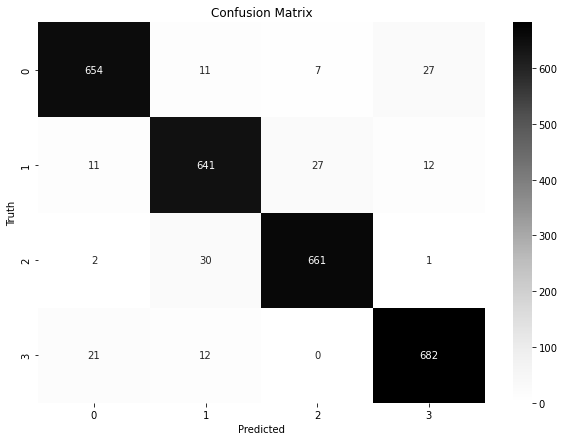

In [24]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')